In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
# to print numbers in a nice way
import locale
import re
import seaborn as sns
from modules import transaction_fx as trns
from modules import plot_functions as plt_fx
from modules import dem_fx

os.getcwd()

'/Users/lou/Documents/Travail/master 2/ADA/epfl-ada-2019-project-bubble582/code'

In [6]:
#load

#run the fix_household_composition notebook and save the final dataframe as hh_demographic_fxd
hh_demographic_fxd = pd.read_csv('../data/hh_demographic_fxd.csv', sep = ',')

#run the product notebook and save the final dataframe product as products_labelled
products_labelled = pd.read_csv('./saved_structures/products_Labelled.csv', sep = ',')

In [7]:
hh_demographic = hh_demographic_fxd
hh_demographic.loc[hh_demographic['MARITAL_STATUS_CODE'] == 'M', 'MARITAL_STATUS_CODE'] = 2
hh_demographic.loc[hh_demographic['MARITAL_STATUS_CODE'] == 'S', 'MARITAL_STATUS_CODE'] = 1

hh_demographic.loc[hh_demographic['AGE_DESC'] == '65+', 'AGE_DESC'] = 65
hh_demographic.loc[hh_demographic['AGE_DESC'] == '45-54', 'AGE_DESC'] = 50
hh_demographic.loc[hh_demographic['AGE_DESC'] == '25-34', 'AGE_DESC'] = 30
hh_demographic.loc[hh_demographic['AGE_DESC'] == '35-44', 'AGE_DESC'] = 40
hh_demographic.loc[hh_demographic['AGE_DESC'] == '19-24', 'AGE_DESC'] = 20
hh_demographic.loc[hh_demographic['AGE_DESC'] == '55-64', 'AGE_DESC'] = 60

hh_demographic.loc[hh_demographic['INCOME_DESC'] == 'Under 15K', 'INCOME_DESC'] = 15
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '15-24K', 'INCOME_DESC'] = 19.5
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '25-34K', 'INCOME_DESC'] = 29.5
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '35-49K', 'INCOME_DESC'] = 42
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '50-74K', 'INCOME_DESC'] = 62
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '75-99K', 'INCOME_DESC'] = 87
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '100-124K', 'INCOME_DESC'] = 112
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '125-149K', 'INCOME_DESC'] = 137
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '150-174K', 'INCOME_DESC'] = 162
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '175-199K', 'INCOME_DESC'] = 187
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '200-249K', 'INCOME_DESC'] = 245
hh_demographic.loc[hh_demographic['INCOME_DESC'] == '250K+', 'INCOME_DESC'] = 250

hh_demographic.loc[hh_demographic['HOUSEHOLD_SIZE_DESC'] == '5+', 'HOUSEHOLD_SIZE_DESC'] = 5
hh_demographic.loc[hh_demographic['HOUSEHOLD_SIZE_DESC'] == '4', 'HOUSEHOLD_SIZE_DESC'] = 4
hh_demographic.loc[hh_demographic['HOUSEHOLD_SIZE_DESC'] == '3', 'HOUSEHOLD_SIZE_DESC'] = 3
hh_demographic.loc[hh_demographic['HOUSEHOLD_SIZE_DESC'] == '2', 'HOUSEHOLD_SIZE_DESC'] = 2
hh_demographic.loc[hh_demographic['HOUSEHOLD_SIZE_DESC'] == '1', 'HOUSEHOLD_SIZE_DESC'] = 1

hh_demographic.loc[hh_demographic['KIDS_DESC'] == '3+', 'KIDS_DESC'] = 3
hh_demographic.loc[hh_demographic['KIDS_DESC'] == '2', 'KIDS_DESC'] = 2
hh_demographic.loc[hh_demographic['KIDS_DESC'] == '1', 'KIDS_DESC'] = 1
hh_demographic.loc[hh_demographic['KIDS_DESC'] == '0', 'KIDS_DESC'] = 0

hh_demographic.loc[hh_demographic['HOMEOWNER_DESC'] == 'Homeowner', 'HOMEOWNER_DESC'] = 4
hh_demographic.loc[hh_demographic['HOMEOWNER_DESC'] == 'Probable Owner', 'HOMEOWNER_DESC'] = 3
hh_demographic.loc[hh_demographic['HOMEOWNER_DESC'] ==  'Renter', 'HOMEOWNER_DESC'] = 2
hh_demographic.loc[hh_demographic['HOMEOWNER_DESC'] == 'Probable Renter', 'HOMEOWNER_DESC'] = 1
hh_demographic.loc[hh_demographic['HOMEOWNER_DESC'] == 'Unknown', 'HOMEOWNER_DESC'] = 0

hh_demographic= hh_demographic.drop(['Unnamed: 0','household_key'], axis =1)

In [8]:
hh_demographic.corr()

,AGE_DESC,MARITAL_STATUS_CODE,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KIDS_DESC
AGE_DESC,1.000000,0.064945,0.204559,-0.117921,-0.176738
MARITAL_STATUS_CODE,0.064945,1.000000,0.420214,0.636404,0.293384
HOMEOWNER_DESC,0.204559,0.420214,1.000000,0.323292,0.191323
HOUSEHOLD_SIZE_DESC,-0.117921,0.636404,0.323292,1.000000,0.922472
KIDS_DESC,-0.176738,0.293384,0.191323,0.922472,1.000000


Text(0.5, 1, 'Correlation matrix: Demographic data')

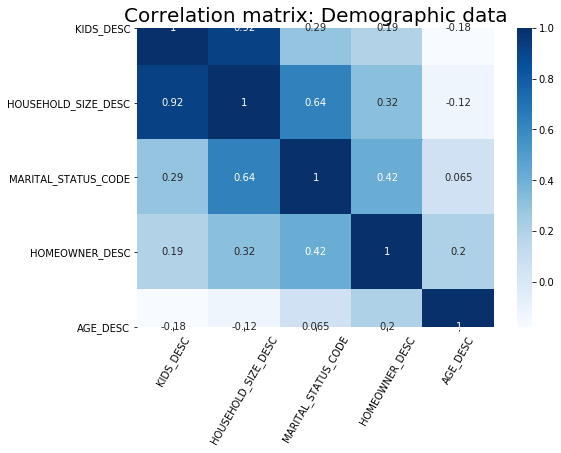

In [9]:
#correlation age and marital status
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(8,5.5))
#Quality correlation matrix
k = 5 #number of variables for heatmap
cols = hh_demographic.corr().nlargest(k, 'KIDS_DESC')['KIDS_DESC'].index
cm = hh_demographic[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'Blues')

plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.title('Correlation matrix: Demographic data',fontsize=20)


As we can see in this correlation matrix, there is an important correlation in between the kid number and the household size, which is required for a coherent data. Moreover we observe a strong correlation (0.63) in between the household size and the marital status, which let us think that most people with kids are married. We also observe week correlations for the household size and the owning status, for the marital status and the owning status and for the income and the owning status.

We find no correlation with the age of the participants.

NameError: name 'df' is not defined

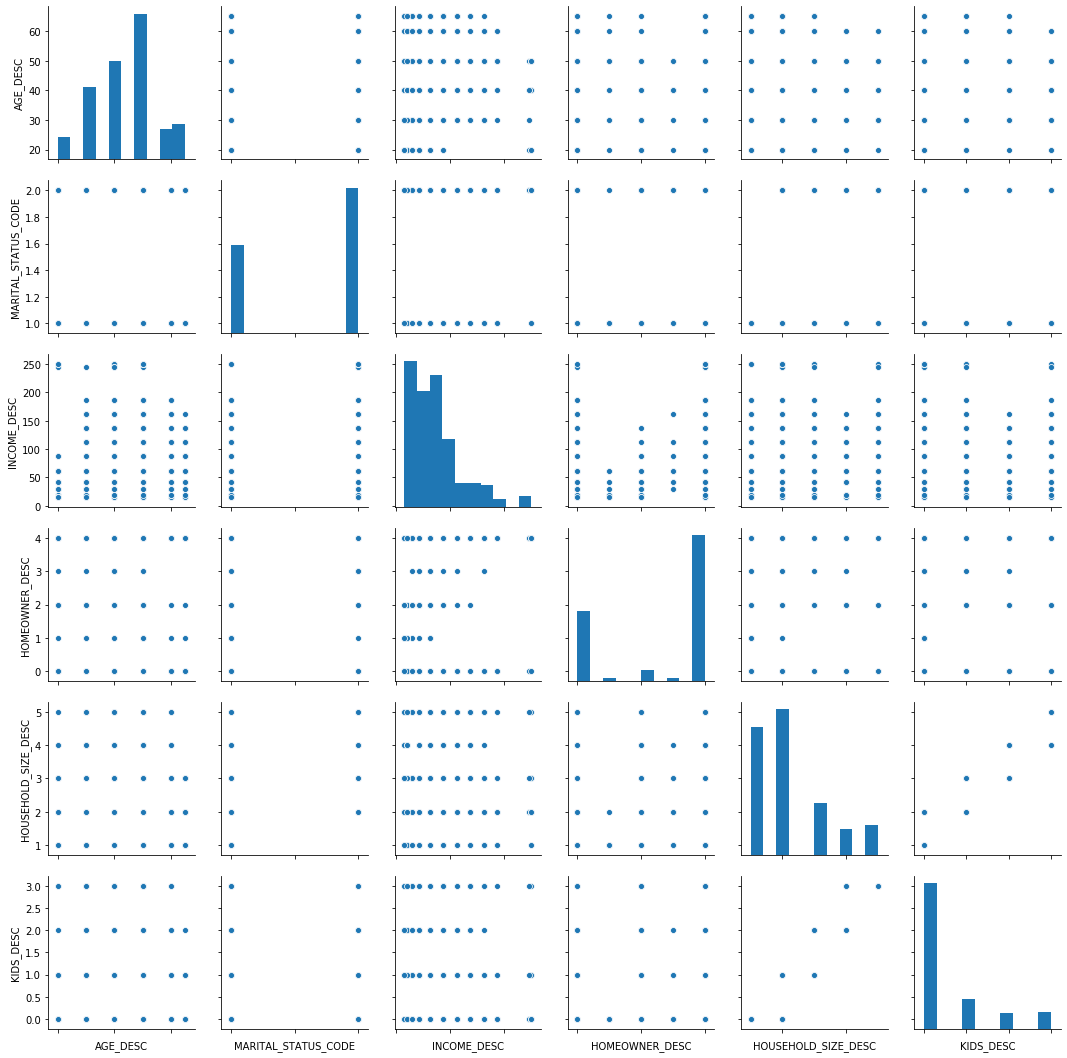

In [10]:
g = sns.pairplot(hh_demographic)
g.set(xticklabels=[])

sns.lmplot(x='fdr_old', y='fdr_new', data=df)

**CHECK AT OUTLIERS**

In [ ]:
# data skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(hh_demographic[l[i]],kde=True) 

In [ ]:
l = hh_demographic.drop(['MARITAL_STATUS_CODE','HOMEOWNER_DESC'], axis =1).columns.values
number_of_columns=6
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(hh_demographic[l[i]],color='pink',orient='v')
    plt.tight_layout()

**BOX PLOT FOR **

In [13]:
filtered_income= pd.read_csv('./saved_structures/filtered_income.csv', sep = '\t')
filtered_income.head()

,participation_length,mean weekly spending,mean yearly spending,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KIDS_DESC
0,84,101.947857,4281.810,25-34,M,75-99K,Homeowner,4,2
1,81,74.128889,3002.220,45-54,M,100-124K,Homeowner,2,0
2,92,103.023152,4739.065,35-44,S,15-24K,Unknown,1,0
3,77,69.400649,2671.925,25-34,M,75-99K,Renter,2,0
4,83,61.243735,2541.615,45-54,M,75-99K,Homeowner,2,0


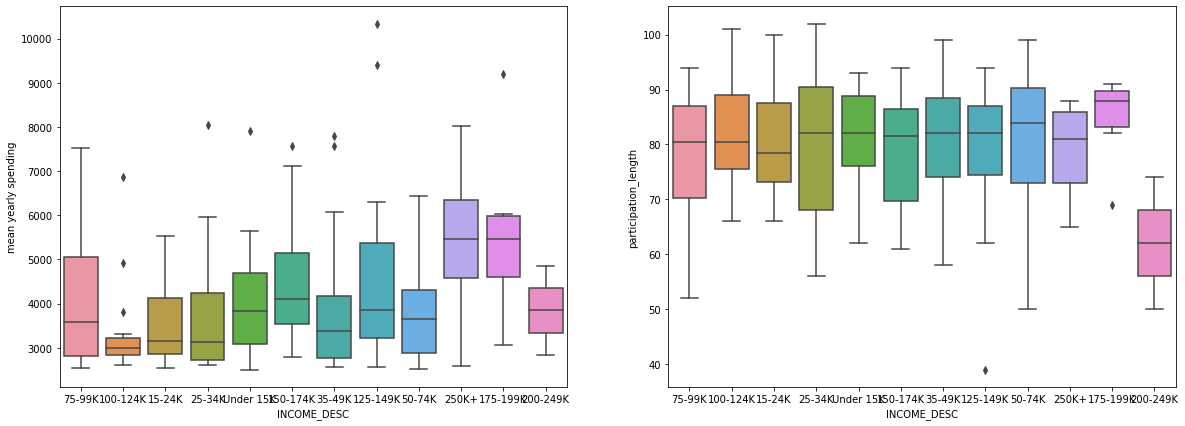

In [20]:
fig = plt.figure(figsize = (20,7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


sns.boxplot(x="INCOME_DESC", y='mean yearly spending', data=filtered_income, ax = ax1)
ax1=sns.boxplot(x="INCOME_DESC", y='participation_length', data=filtered_income, ax = ax2)


**PRODUCTS**

In [27]:
weekly_cart_df = pd.read_csv("./saved_structures/weekly_cart_df.csv", sep ='\t')

weekly_cart_df.head(4)

,PRODUCE_QUANT,FAST FOOD & SNACKS_QUANT,HOUSEHOLDS_QUANT,DAIRY_QUANT,MEAT & SEAFOOD_QUANT,BAKERY_QUANT,CONDIMENTS_QUANT,BEVERAGES_QUANT,PET_QUANT,SMOKING_QUANT,FROZEN_QUANT,SPICE/HERBS_QUANT,TECHNOLOGY_QUANT,not found_QUANT,PHARMACY_QUANT,STATIONERY_QUANT,SPIRITS_QUANT
0,6.469697,8.318182,2.969697,2.424242,2.287879,2.606061,0.378788,1.712121,0.151515,0.075758,0.545455,0.227273,0.545455,0.060606,0.136364,0.030303,0.0
1,4.514286,3.542857,4.685714,1.628571,2.285714,1.028571,0.514286,2.571429,0.828571,0.285714,0.314286,0.228571,0.114286,0.200000,0.114286,0.314286,0.0
2,8.333333,15.833333,2.277778,0.694444,5.472222,1.861111,1.277778,3.666667,1.888889,0.055556,2.000000,0.222222,0.055556,0.027778,0.055556,0.333333,0.0
3,0.920000,3.760000,1.720000,1.560000,1.800000,1.120000,0.400000,0.640000,0.000000,0.600000,2.000000,0.240000,0.000000,0.200000,0.080000,0.000000,0.0


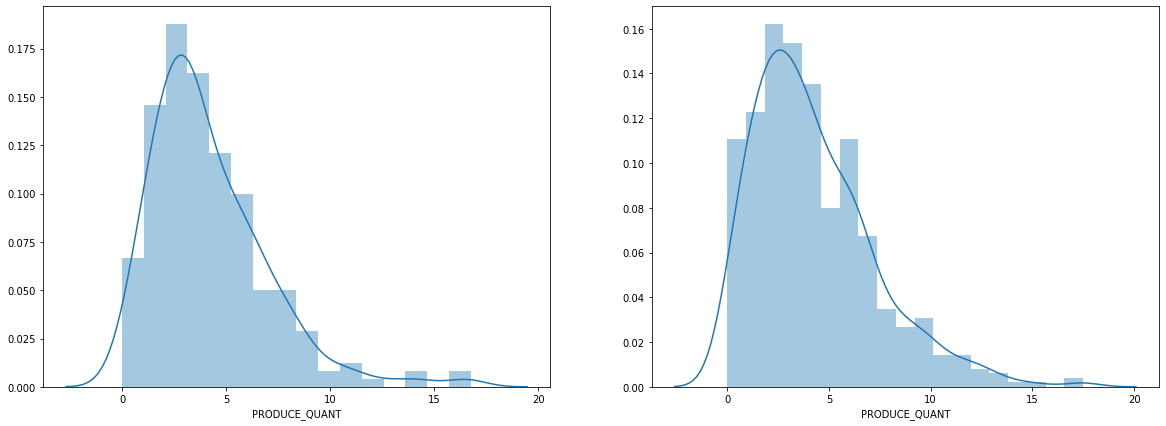

In [37]:
kids_index = hh_demographic_fxd[hh_demographic_fxd['KIDS_DESC']> 0].index
no_kids_index = hh_demographic_fxd[hh_demographic_fxd['KIDS_DESC']== 0].index
kids_weeklycart = weekly_cart_df.loc[kids_index]
no_kids_weeklycart = weekly_cart_df.loc[no_kids_index]

fig = plt.figure(figsize = (20,7))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)



sns.distplot(kids_weeklycart.PRODUCE_QUANT,ax = ax1);
sns.distplot(no_kids_weeklycart.PRODUCE_QUANT, ax =ax2);

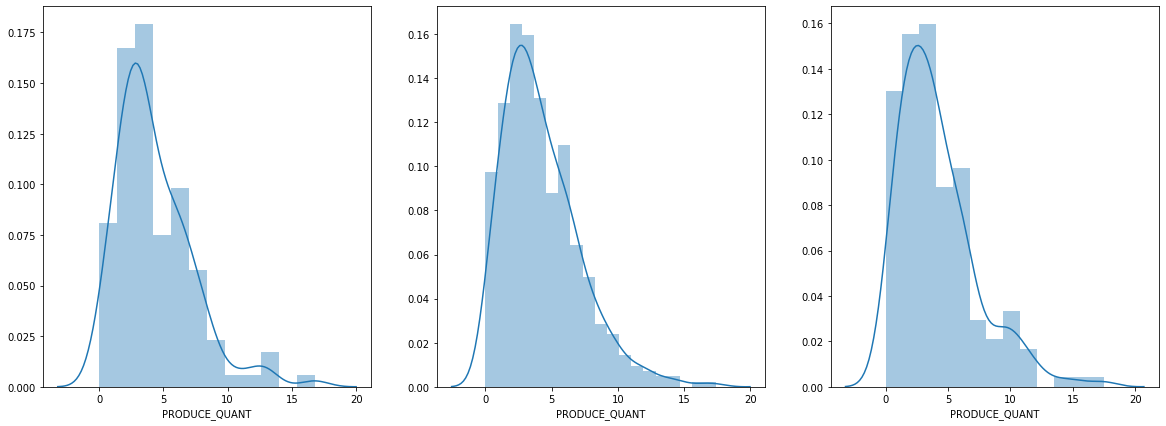

In [43]:
old_index = hh_demographic_fxd[hh_demographic['AGE_DESC']>= 60].index
young_index = hh_demographic_fxd[hh_demographic['AGE_DESC'] <= 30].index
middleage_index = hh_demographic_fxd[(hh_demographic['AGE_DESC'] > 30) & (hh_demographic['AGE_DESC'] < 60)].index
old_weeklycart = weekly_cart_df.loc[old_index]
middleage_weeklycart = weekly_cart_df.loc[middleage_index]
young_weeklycart = weekly_cart_df.loc[young_index]

fig = plt.figure(figsize = (20,7))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



sns.distplot(old_weeklycart.PRODUCE_QUANT,ax = ax1);
sns.distplot(middleage_weeklycart.PRODUCE_QUANT,ax = ax2);
sns.distplot(young_weeklycart.PRODUCE_QUANT, ax =ax3);

In [42]:
middleage_index 

Int64Index([], dtype='int64')